In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [275]:
data = pd.read_csv('car_listings2.csv')
data = data[(data['price'] > 0) == True]
data.head(10)

,vin,year,make,model,trim,price,mileage,drivetrain,transmission,city,state,exterior_color,interior_color,num_accidents,num_owners,use_type
0,VIN3C4NJDCB2JT117087,2018,Jeep,Compass,Limited,18523.0,90026,4WD,Unknown,Raleigh,NC,White,Black,1,1,Personal
1,VIN3FA6P0PU5FR299269,2015,Ford,Fusion,Energi SE Luxury,16999.0,65628,FWD,Unknown,Online,NaN,White,Black,0,2,Personal
2,VIN5YJSA1E68NF476689,2022,Tesla,Model S,Plaid,114990.0,11,Unknown,Unknown,Manhattan,KS,White,Black,0,1,Personal
3,VIN1FTEW1EG4JFD01384,2018,Ford,F-150,XLT SuperCrew 5.5' Box,17990.0,201264,4WD,Unknown,Wilmington,NC,Silver,Gray,0,1,Personal
4,VIN1FTEW1EB4MFA62542,2021,Ford,F-150,XLT SuperCrew 5.5' Box,38499.0,15745,4WD,Unknown,Blackfoot,ID,White,Black,0,1,Personal
5,VIN1FTFW1E89MFA71147,2021,Ford,F-150,XLT SuperCrew 5.5' Box,35990.0,45732,4WD,Unknown,North Lake City,UT,Blue,Black,1,1,Personal
6,VIN1FTEW1E4XKFA85239,2019,Ford,F-150,XLT SuperCrew 5.5' Box,32300.0,34572,4WD,Unknown,Post Falls,ID,Red,Gray,0,1,Personal
7,VIN1FTEW1EP5LKF18954,2020,Ford,F-150,XL SuperCrew 5.5' Box,26999.0,76799,4WD,Unknown,Littleton,CO,White,Gray,0,1,Personal
8,VIN1FTEW1EB5KFC57627,2019,Ford,F-150,XLT SuperCrew 5.5' Box,24224.0,114036,4WD,Unknown,Fort Wayne,IN,Black,Gray,0,1,Personal
9,VINJTDKN3DU2A0027744,2010,Toyota,Prius,Two,9991.0,130678,Unknown,Unknown,Sacramento,CA,White,Unknown,0,3,Personal


In [276]:
X = data[['year', 'make', 'model', 'trim', 'mileage', 'drivetrain', 'transmission', 'city', 'state', 'exterior_color', 'interior_color', 'num_accidents', 'num_owners', 'use_type']]
data['year'] = 2023-data['year']
x0 = data['year']
x1 = data['make']
x2 = data['model']
x3 = data['trim']
x4 = data['mileage']
x5 = data['drivetrain']
x6 = data['transmission']
x7 = data['city']
x8 = data['state']
x9 = data['exterior_color']
x10 = data['interior_color']
x11 = data['num_accidents']
x12 = data['num_owners']
x13 = data['use_type']
x14 = data['price']
lb = LabelEncoder()
x1 = lb.fit_transform(x1)
x2 = lb.fit_transform(x2)
x3 = lb.fit_transform(x3)
x5 = lb.fit_transform(x5)
x6 = lb.fit_transform(x6)
x7 = lb.fit_transform(x7)
x8 = lb.fit_transform(x8)
x9 = lb.fit_transform(x9)
x10 = lb.fit_transform(x10)
x13 = lb.fit_transform(x13)
data = pd.DataFrame({'age': x0, 'make': x1, 'model': x2, 'trim': x3, 'mileage': x4, 'drivetrain': x5, 'transmission': x6, 'city': x7, 'state': x8, 'exterior_color': x9, 'interior_color': x10, 'num_accidents': x11, 'num_owners': x12, 'use_type': x13, 'price': x14})
data.head(10)

,age,make,model,trim,mileage,drivetrain,transmission,city,state,exterior_color,interior_color,num_accidents,num_owners,use_type,price
0,5,22,166,857,90026,0,2,2513,24,16,1,1,1,1,18523.0
1,8,13,277,518,65628,2,2,2467,47,16,1,0,2,1,16999.0
2,1,48,430,988,11,4,2,2417,13,16,1,0,1,1,114990.0
3,5,13,248,1788,201264,0,2,2598,24,12,4,0,1,1,17990.0
4,2,13,248,1788,15745,0,2,2268,10,16,1,0,1,1,38499.0
5,2,13,248,1788,45732,0,2,2460,41,2,1,1,1,1,35990.0
6,4,13,248,1788,34572,0,2,2511,10,11,4,0,1,1,32300.0
7,3,13,248,1754,76799,0,2,2406,4,16,4,0,1,1,26999.0
8,4,13,248,1788,114036,0,2,2344,12,1,4,0,1,1,24224.0
9,13,49,484,1618,130678,4,2,2523,3,16,8,0,3,1,9991.0


In [277]:
X = data[['age', 'make', 'model', 'trim', 'mileage', 'drivetrain', 'transmission', 'city', 'state', 'exterior_color', 'interior_color', 'num_accidents', 'num_owners', 'use_type']]
Y = data['price']

In [278]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [279]:
model = DecisionTreeRegressor(criterion='friedman_mse')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [280]:
from sklearn.metrics import accuracy_score
differences = Y_test - predictions
print(f'Accuracy {round(accuracy_score(Y_test, predictions)*100, 2)}%')
display(pd.DataFrame({'Actual Price': Y_test, 'Predicted Price': predictions, 'Difference': differences}).sort_index())

Accuracy 5.92%


,Actual Price,Predicted Price,Difference
0,18523.0,20500.0,-1977.0
3,17990.0,14991.0,2999.0
16,19793.0,20500.0,-707.0
21,27554.0,32476.0,-4922.0
22,19995.0,19439.0,556.0
...,...,...,...
8684,15995.0,15995.0,0.0
8686,44494.0,44777.0,-283.0
8694,37690.0,37990.0,-300.0
8695,49601.0,31594.0,18007.0


[Text(0.5, 0.875, 'mileage <= 52221.5\nfriedman_mse = 388969037.406\nsamples = 6888\nvalue = 30279.57'),
 Text(0.25, 0.625, 'age <= 1.5\nfriedman_mse = 502209732.338\nsamples = 3736\nvalue = 37638.518'),
 Text(0.125, 0.375, 'interior_color <= 9.5\nfriedman_mse = 581134303.163\nsamples = 745\nvalue = 48724.217'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'interior_color <= 8.5\nfriedman_mse = 444316555.785\nsamples = 2991\nvalue = 34877.285'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'age <= 6.5\nfriedman_mse = 114479075.449\nsamples = 3152\nvalue = 21557.163'),
 Text(0.625, 0.375, 'drivetrain <= 0.5\nfriedman_mse = 105494345.607\nsamples = 1728\nvalue = 26485.411'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'mileage <= 103058.5\nfriedman_mse = 60144734.156\nsamples = 1424\nvalue = 15576.817'),
 Text(0.8125, 0.125, '\n  (

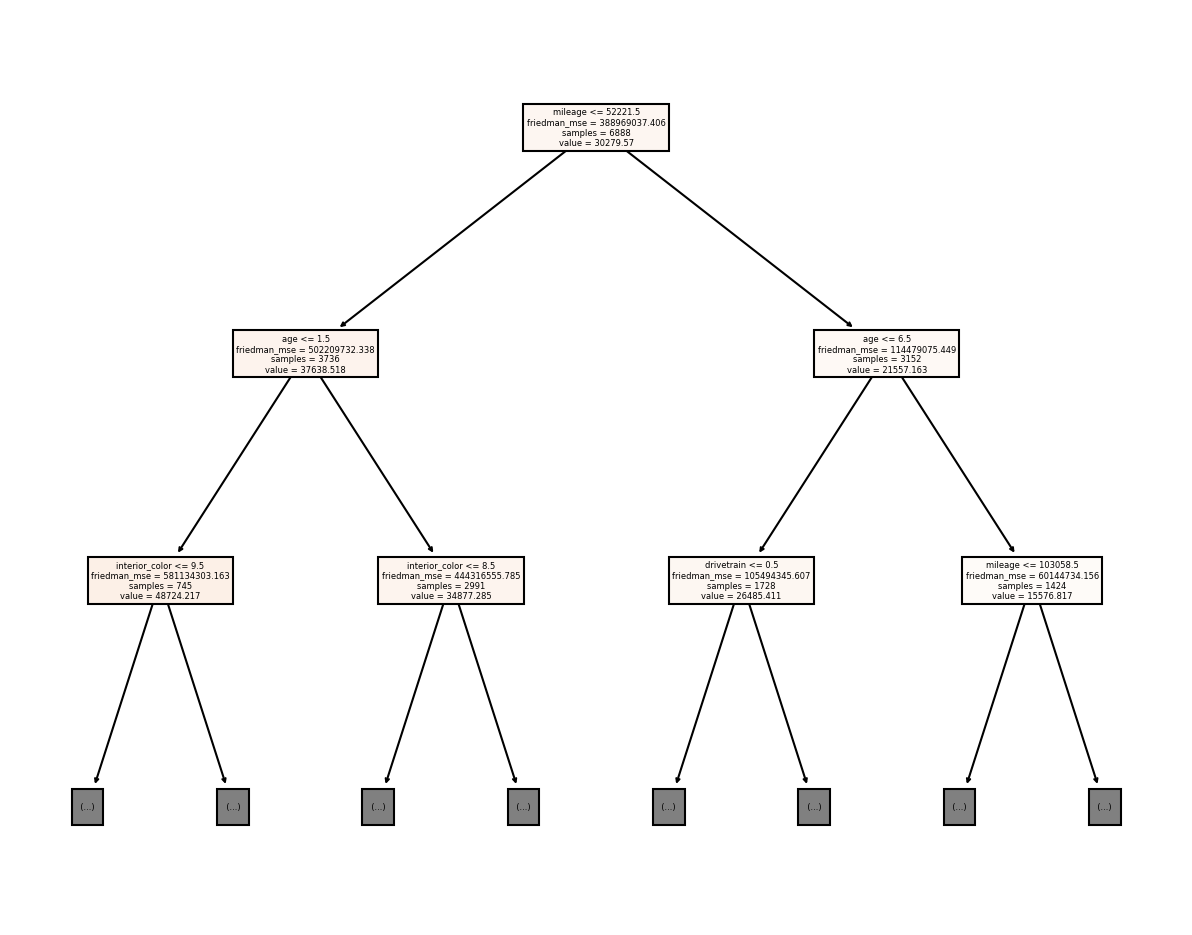

In [281]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=data.columns, max_depth=2, filled=True)